## General Imports

In [1]:
%matplotlib inline
import os
from os import path
from math import ceil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits
from skimage.transform import resize
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

## SOONAR Data Visualization

In [2]:
def plot_FIT(hdul):
    fig=plt.figure(figsize=(25, len(hdul)))
    columns = 5
    rows = ceil(len(hdul)/5)
    image_index = 0
    for i in range(1, columns*rows +1):
        if(image_index < len(hdul)):
            img = hdul[image_index].data
        else:
            return
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
        plt.axis('off')
        image_index += 1
    plt.show()

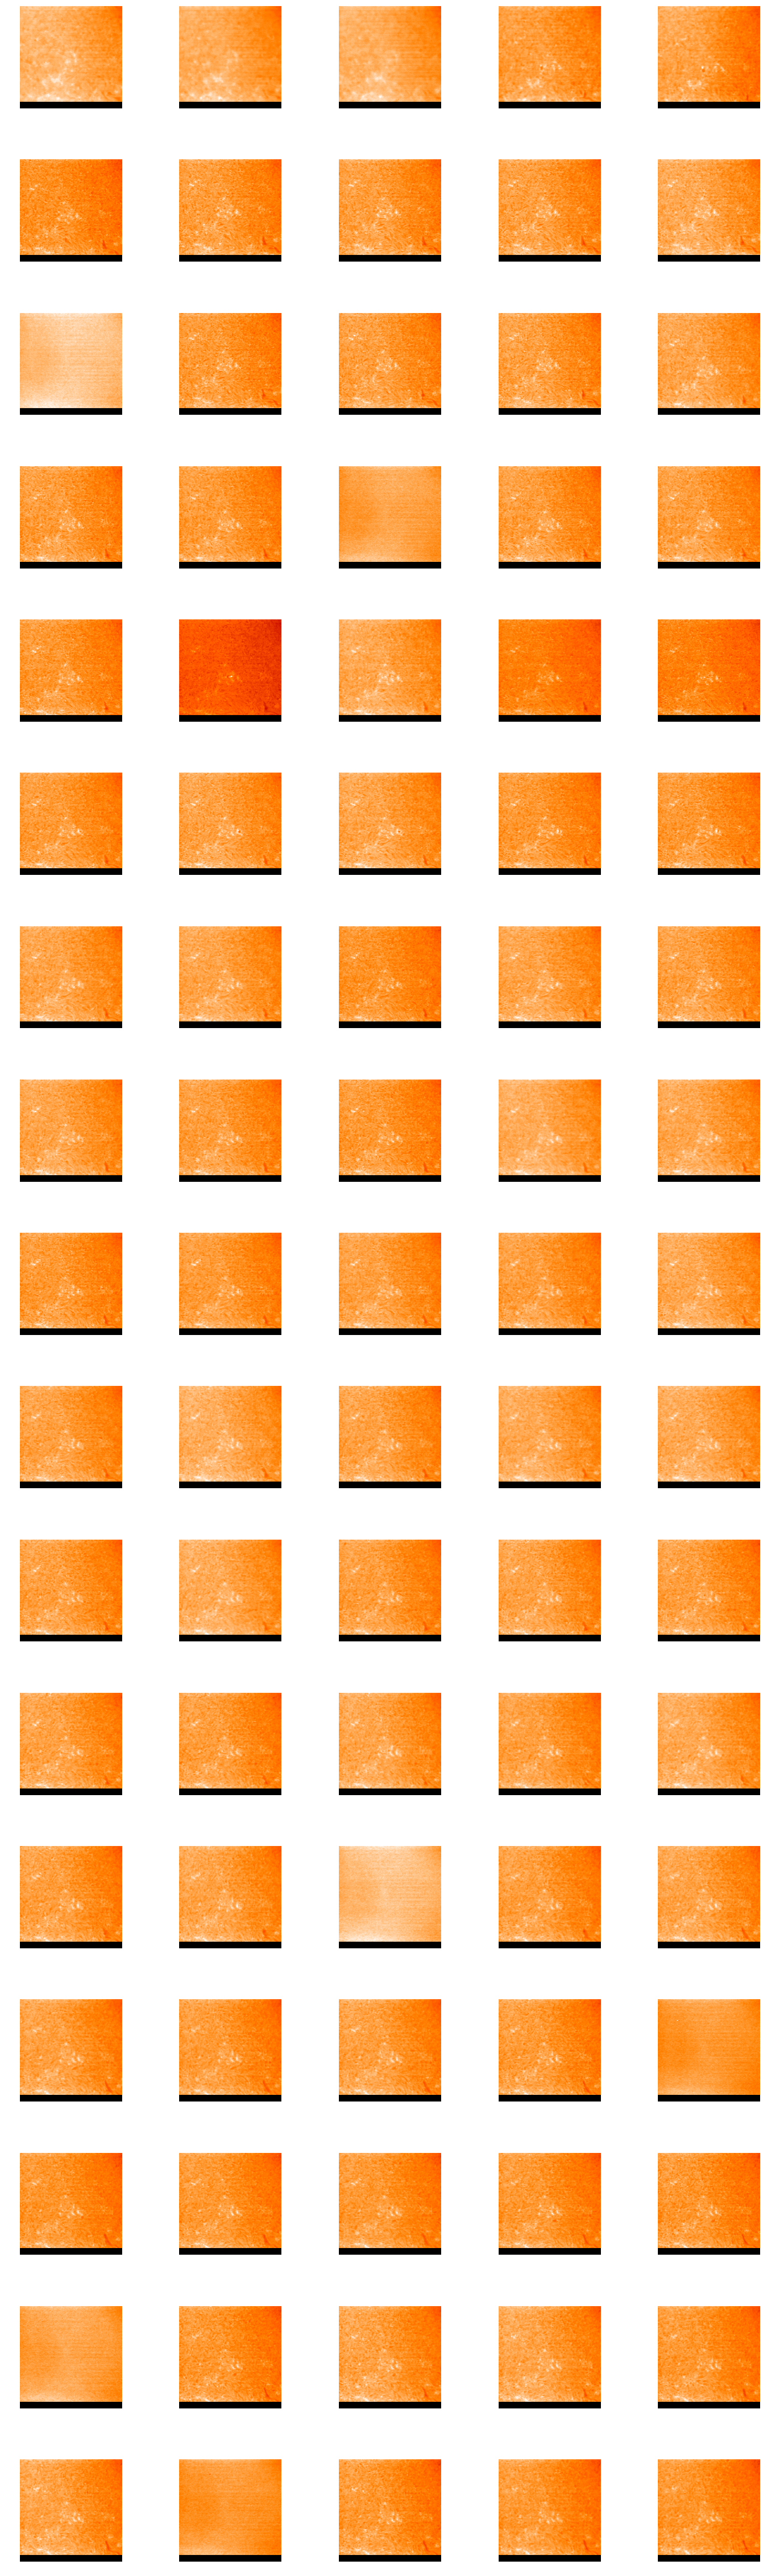

In [3]:
hdul1 = fits.open('/Volumes/SOONAR FAST/SOONAR/2016/10OCT/18/0000-2357-SN84-HOLL.FIT')
plot_FIT(hdul1)

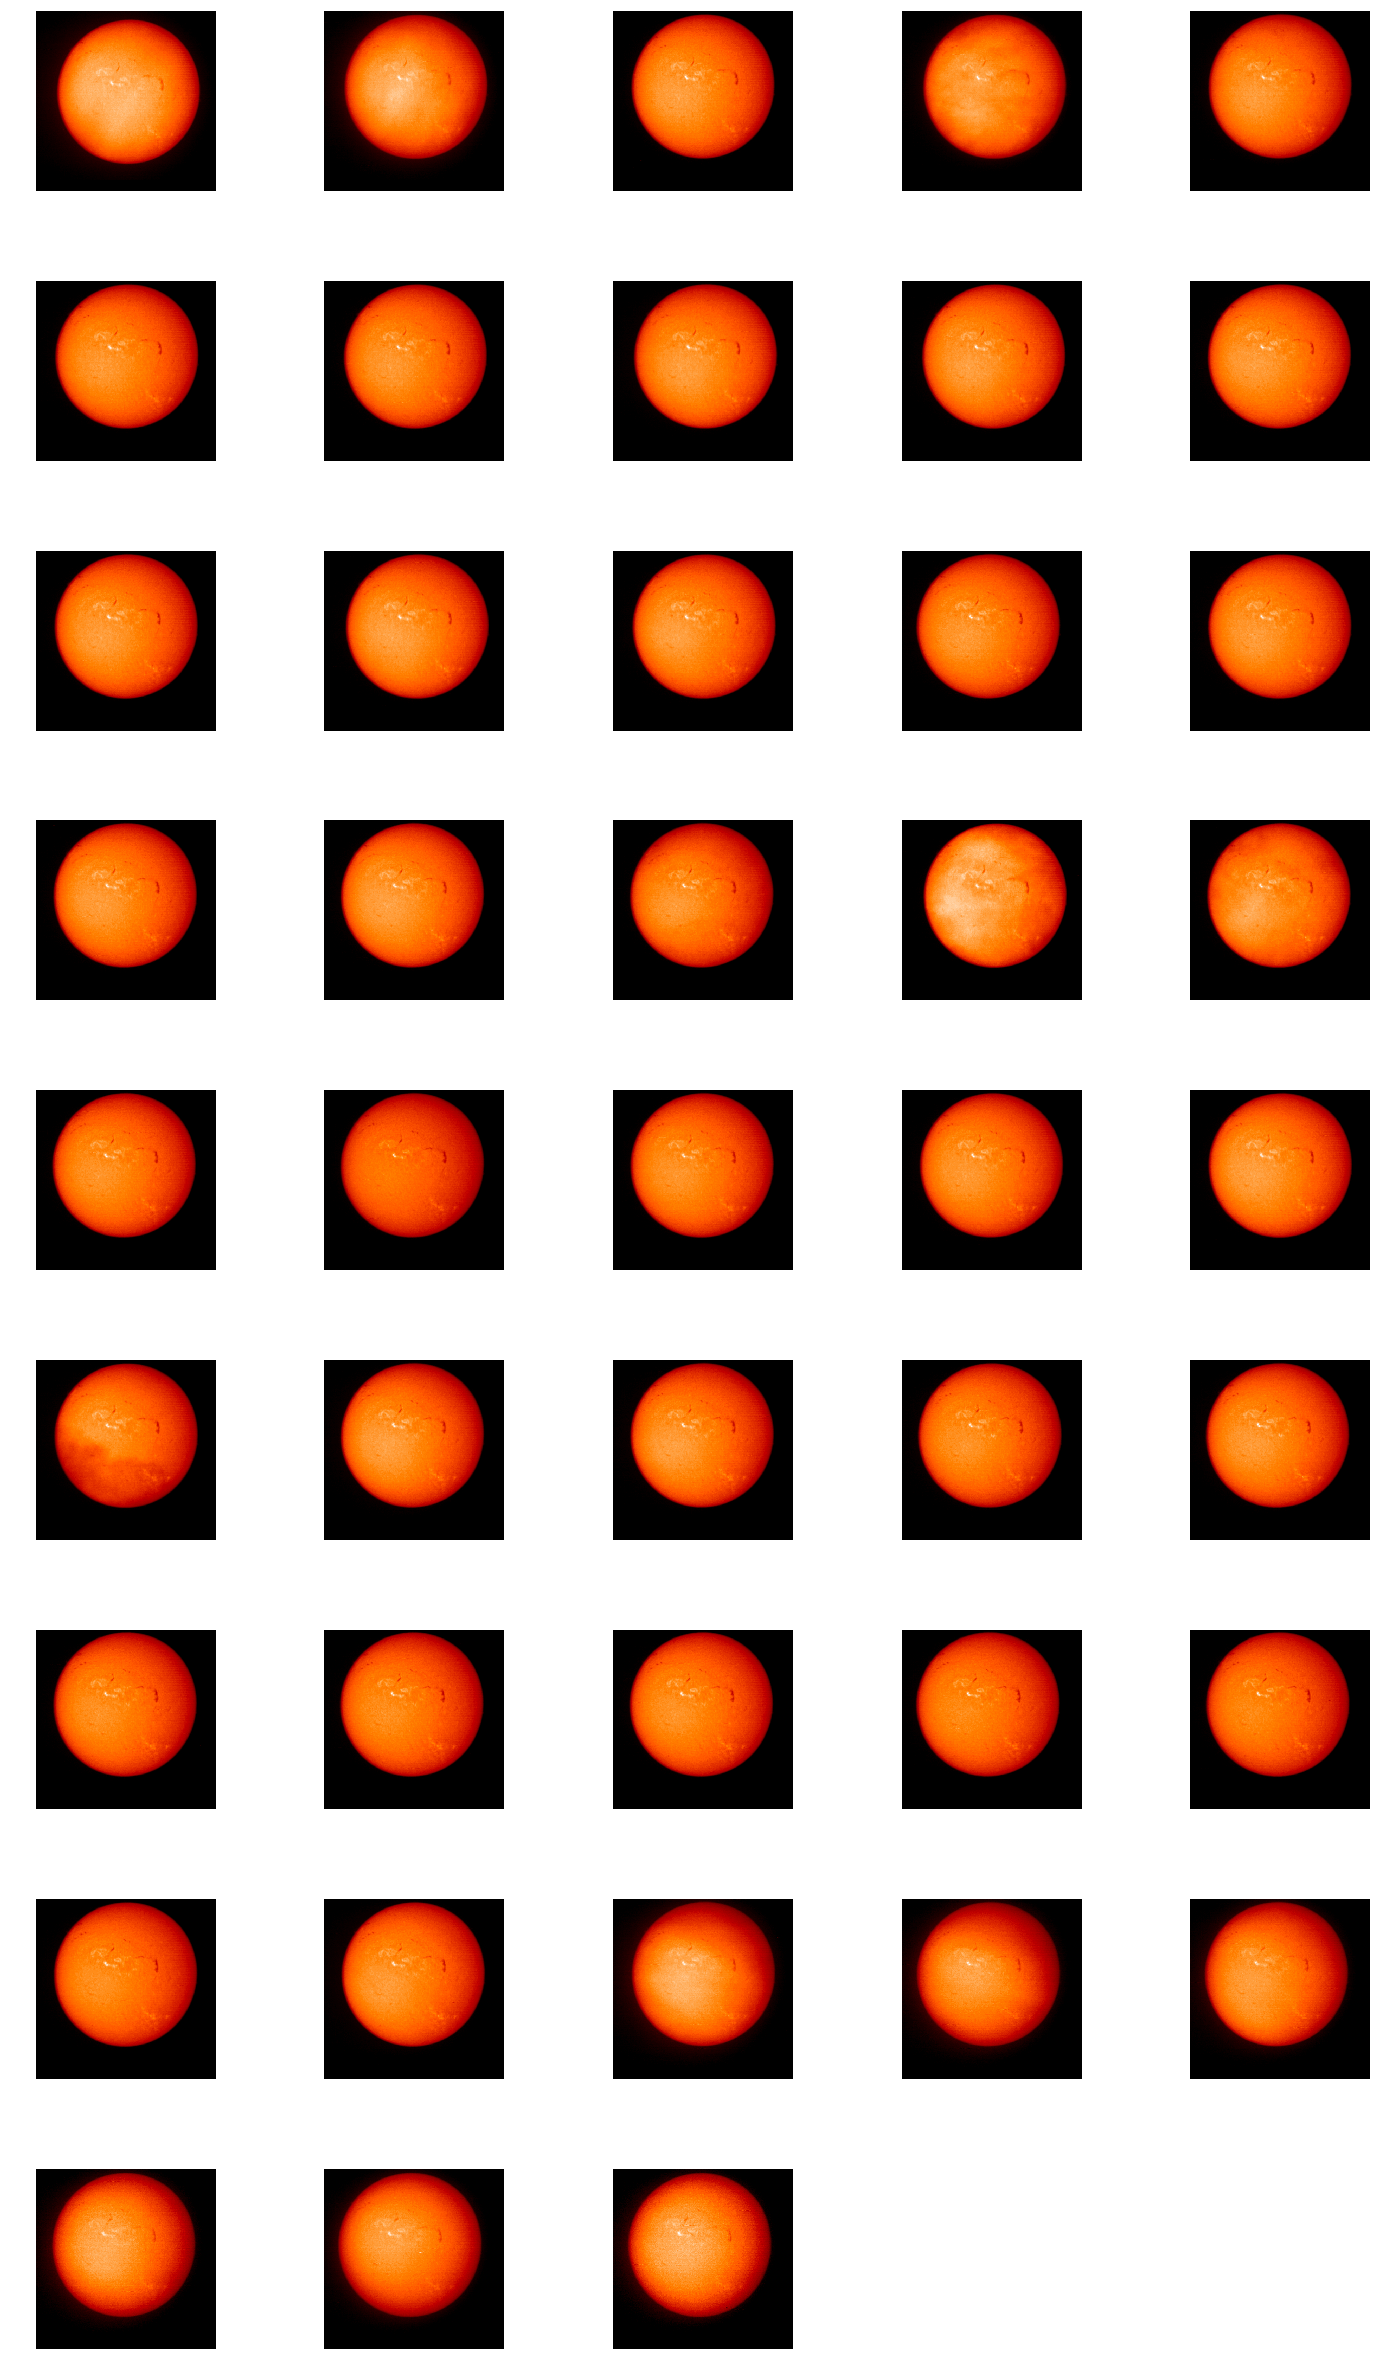

In [4]:
hdul2 = fits.open('/Volumes/SOONAR FAST/SOONAR/2016/10OCT/18/0800-1413-9999-SANV.FIT')
plot_FIT(hdul2)

## Preprocessing SOONAR data into pandas df

In [5]:
no_FITS1 = '/Volumes/SOONAR FAST/SOONAR/2016/10OCT/18/0000-2357-SN84-HOLL.FIT'
yes_FITS1 = '/Volumes/SOONAR FAST/SOONAR/2016/10OCT/18/0800-1413-9999-SANV.FIT'
yes_FITS2 = '/Volumes/SOONAR FAST/SOONAR/2016/10OCT/18/0000-2358-9999-HOLL.FIT'
hdul1 = fits.open(no_FITS1)
hdul2 = fits.open(yes_FITS1)
hdul3 = fits.open(yes_FITS1)

image_data = resize(hdul1[0].data, (32,32), anti_aliasing = False).reshape(1,32*32)
label_data = np.array([0])
for i in range(1, len(hdul1)):
    resize_data = resize(hdul1[i].data, (32,32), anti_aliasing = False)
    reshape_data = resize_data.reshape(1,32*32)
    image_data = np.concatenate((image_data, reshape_data), axis = 0)
    label_data = np.append(label_data, 0)
for i in range(0,len(hdul2)):
    resize_data = resize(hdul2[i].data, (32,32), anti_aliasing = False)
    reshape_data = resize_data.reshape(1,32*32)
    image_data = np.concatenate((image_data, reshape_data), axis = 0)
    label_data = np.append(label_data, 1)
for i in range(0,len(hdul3)):
    resize_data = resize(hdul3[i].data, (32,32), anti_aliasing = False)
    reshape_data = resize_data.reshape(1,32*32)
    image_data = np.concatenate((image_data, reshape_data), axis = 0)
    label_data = np.append(label_data, 1)

df = pd.DataFrame(np.concatenate((label_data.reshape(len(label_data),1), image_data), axis =1))

/Users/jeparker/anaconda/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [6]:
df = df.reindex(np.random.permutation(df.index))
df.head()

0         1         2         3         4         5         6     \
28    0.0  0.535294  0.540196  0.536275  0.581373  0.558824  0.550980   
128   1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
49    0.0  0.529412  0.569608  0.559804  0.535294  0.539216  0.560784   
169   1.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
26    0.0  0.526471  0.556863  0.531373  0.552941  0.566667  0.578431   

         7         8         9     ...   1015  1016  1017  1018  1019  1020  \
28   0.553922  0.558824  0.545098  ...    0.0   0.0   0.0   0.0   0.0   0.0   
128  0.003922  0.009804  0.013725  ...    0.0   0.0   0.0   0.0   0.0   0.0   
49   0.554902  0.572549  0.544118  ...    0.0   0.0   0.0   0.0   0.0   0.0   
169  0.000000  0.001961  0.003922  ...    0.0   0.0   0.0   0.0   0.0   0.0   
26   0.551961  0.580392  0.501961  ...    0.0   0.0   0.0   0.0   0.0   0.0   

     1021  1022  1023  1024  
28    0.0   0.0   0.0   0.0  
128   0.0   0.0   0.0   0.0  
49    0.0   0.0   0.0   0.0  
169   0.0   0.0   0.0   0.0  
26    0.0   0.0   0.0   0.0  

[5 rows x 1025 columns]

In [7]:
x_train = df.loc[:,1:1024].values[0:100]
y_train = df.loc[:,0].values[0:100]

x_test = df.loc[:,1:1024].values[100:150]
y_test = df.loc[:,0].values[100:150]

x_eval = df.loc[:,1:1024].values[150:170]
y_eval = df.loc[:,0].values[150:170]

## Keras Imports

In [8]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.
/Users/jeparker/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


## Keras CNN Implementation

In [ ]:
x_train = x_train.reshape(len(x_train),32,32,1)
x_test = x_test.reshape(len(x_test),32,32,1)

y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

x_eval = x_eval.reshape(len(x_eval),32,32,1)
y_eval = np.array(list(map(int, y_eval)))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(32,32,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
model.fit(x_train, y_train,
          batch_size=10,
          epochs=5,
          verbose = 1,
          validation_data=(x_test, y_test), 
          shuffle = True)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

## Keras NN Implementation

In [9]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
y_eval = np.array(list(map(int, y_eval)))

In [10]:
model = Sequential()
model.add(Dense(4, activation = 'relu', input_shape = (1024,)))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 4100      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 10        
Total params: 4,159
Trainable params: 4,159
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(x_train, y_train,
          batch_size=10,
          epochs=10,
          verbose = 1,
          validation_data=(x_test, y_test), 
          shuffle = True)

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 0s 3ms/step - loss: 0.6805 - acc: 0.7050 - val_loss: 0.6623 - val_acc: 1.0000
Epoch 2/10
100/100 [==============================] - 0s 273us/step - loss: 0.6494 - acc: 0.9650 - val_loss: 0.6240 - val_acc: 1.0000
Epoch 3/10
100/100 [==============================] - 0s 302us/step - loss: 0.6119 - acc: 0.9900 - val_loss: 0.5822 - val_acc: 0.9900
Epoch 4/10
100/100 [==============================] - 0s 287us/step - loss: 0.5735 - acc: 0.9750 - val_loss: 0.5434 - val_acc: 0.9900
Epoch 5/10
100/100 [==============================] - 0s 319us/step - loss: 0.5415 - acc: 0.9650 - val_loss: 0.5109 - val_acc: 0.9900
Epoch 6/10
100/100 [==============================] - 0s 311us/step - loss: 0.5133 - acc: 0.9850 - val_loss: 0.4809 - val_acc: 1.0000
Epoch 7/10
100/100 [==============================] - 0s 286us/step - loss: 0.4874 - acc: 0.9800 - val_loss: 0.4549 - val_acc: 1.0000
Epoch 8/10
100/100 

## Unseen Data Testing

In [12]:
model.predict_classes(x_eval)

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [13]:
y_eval

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1])